# Representing and manipulating images


The aim of this notebook is for you to learn about the representation and manipulation of images in Python.

Run the code cell below to import the Python modules we need. To do this, left-mouse-click inside the cell and press the `► Run` button. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

%matplotlib inline

In /Users/mohammedalghamdi/miniconda3/envs/dl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/mohammedalghamdi/miniconda3/envs/dl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/mohammedalghamdi/miniconda3/envs/dl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/mohammedalghamdi/miniconda3/envs/dl/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two mi

## Read in and show an image
Read in an image stored in the JPEG format. This image has 246 rows and 380 columns of pixels. We read the image into a $246 \times 380 \times 3$ numpy array, where the third dimension indexes the 3 RGB colour channels. Each colour intensity has a value in the range $[0,255]$. 
 

(385, 600, 3)


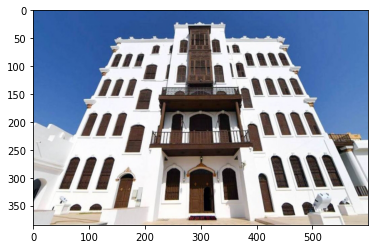

In [2]:
im = plt.imread('shubra.jpg')
print(im.shape)
plt.imshow(im)

## Show the image using slicing

Use slicing to show values in the red channel for a portion of the image.

Each slice is of the form i:j:k, meaning indices start at i, and end at j-1, in increments of k (may be negative). If the final :k is omitted, the increment defaults to 1. If i or j are omitted, they default to the min or max+1 indices respectively.  Notice that each value in the array is an 8-bit unsigned integer.

In [10]:
im[0:10,0:10,2]

array([[170, 170, 170, 169, 168, 169, 171, 170, 171, 171],
       [170, 170, 169, 168, 168, 167, 169, 171, 170, 170],
       [166, 168, 167, 166, 166, 166, 167, 167, 168, 167],
       [164, 167, 165, 166, 164, 165, 166, 164, 165, 165],
       [164, 163, 165, 164, 164, 163, 164, 164, 165, 165],
       [162, 164, 165, 162, 163, 164, 166, 166, 164, 166],
       [162, 163, 163, 162, 160, 161, 164, 164, 164, 164],
       [161, 161, 163, 160, 160, 162, 164, 164, 162, 162],
       [161, 161, 163, 161, 161, 162, 164, 164, 162, 162],
       [164, 163, 163, 163, 163, 164, 166, 164, 164, 164]], dtype=uint8)

Rescale the values to floats in the interval $[0,1]$.  `imshow` expects floats to be in this range.

array([[0.98431373, 0.98039216, 0.98039216, 0.97254902, 0.97647059],
       [0.98431373, 0.98039216, 0.98039216, 0.97647059, 0.97647059],
       [0.98823529, 0.98431373, 0.97647059, 0.98431373, 0.98039216],
       [1.        , 0.99607843, 0.99607843, 0.98823529, 0.98431373],
       [0.99215686, 0.98823529, 0.98823529, 0.98823529, 0.98431373]])

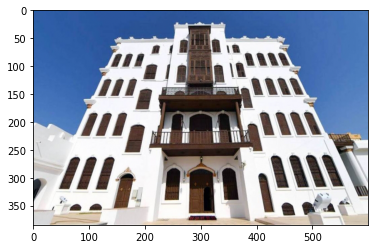

In [12]:
im = im/255
plt.imshow(im)
im[200:205,200:205,0]

Use slicing to invert the image

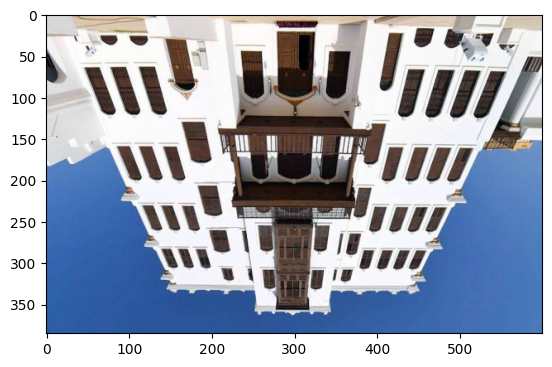

In [5]:
plt.imshow(im[::-1,:,:])

Invert a horizontal section in the middle portion of the image

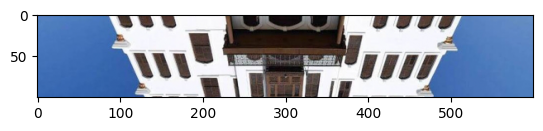

In [6]:
plt.imshow(im[200:100:-1,:,:])

Reverse the order of colour channels (i.e. RGB becomes BGR)

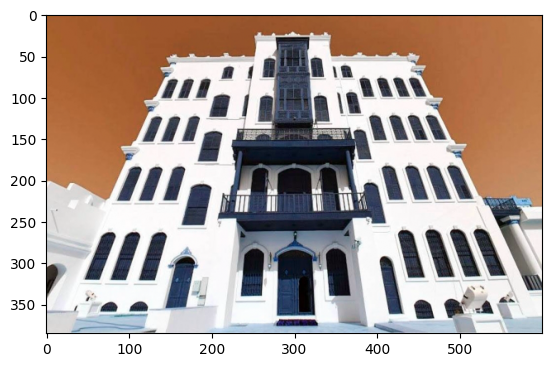

In [7]:
plt.imshow(im[:,:,::-1])

## Using colour maps

Here we extract the red channel and display the resulting 2D array as a colour image. Because we now have only a 2D array of values in the range $[0,1]$, `plt.imshow` generates a colour image by mapping the given values onto a table of colours (a *colour map*), each represented by a triple of red, green and blue values in the range $[0,1]$. There are many built-in colour maps. Here we show the result of using the `jet` colour map. By default, `plt.imshow` scales the data values to the interval . You can also specify a bespoke normalisation as one of the arguments (e.g. logarithmic), or top and bottom values `vmin` and `vmax`.

Note: The colour maps are accessed with values in the range $[0,1]$. The rescaling performed by `plt.imshow` therefore targets this range. If your image contains unit8 values, by default imshow uses a fixed mapping from $[0,255]$ onto the range of the colour map.

(385, 600)


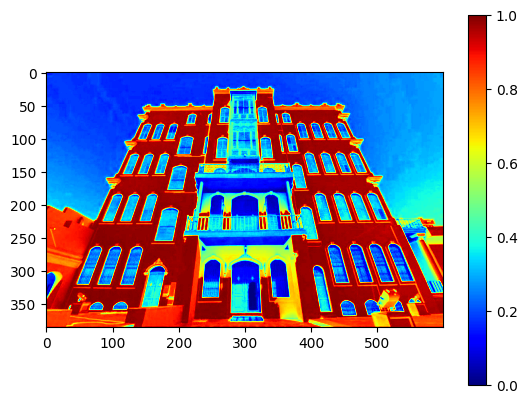

In [8]:
rc = im[:,:,0]
print(rc.shape)
plt.imshow(rc, cmap='jet')
plt.colorbar()

## Displaying multiple images

`plt.subplot` allows us to lay out multiple images as a grid. For clarity, the tick marks have been turned off.

(-0.5, 599.5, 384.5, -0.5)

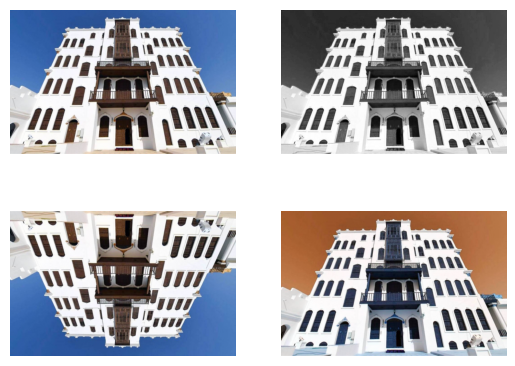

In [9]:
ax = plt.subplot(2,2,1)
plt.imshow(im)
ax.axis('off')

ax = plt.subplot(2,2,2)
plt.imshow(rc,cmap='gray')
ax.axis('off')

ax = plt.subplot(2,2,3)
plt.imshow(im[::-1,:,:])
ax.axis('off')

ax = plt.subplot(2,2,4)
plt.imshow(im[:,:,::-1])
ax.axis('off')

# Exercise

Display in a single figure (using `plt.subplot`) the original image, and the separate red, green and blue components (show these in red, green and blue respectively).

Do this in two ways:

1. For each colour component, create an array of zeros the same shape as the original image (using the function `np.zeros`), and then copy the corresponding colour channel across using slicing. In this way, you create colour images in which two of the colour channels are all zero.

2. Use slicing to extract each colour channel in turn, and then use the corresponding colour map ('Reds', 'Greens', and 'Blues') to display the required image.
